In [1]:
%matplotlib inline
from random import choice
from glob import glob
import matplotlib.pyplot as plt
from os.path import join

from src.hpe.common.typing import MyLandmark, KeypointDrawConfig
from src.hpe.common.mutators import convert_to_bgr
from src.hpe.common.metrics import calc_precision_and_recall, calc_mean_average_precision
from src.hpe.common.performance import log_performance
from src.hpe.common.draw import draw_estimations
from src.hpe.common.plot import plot_precision_recall_curve, plot_landmark_confidence_distributions

loaded labels


## YOLO

In [ ]:
from src.hpe.yolo.performance import DistanceCollector, EstimationCollector, \
    read_distances, read_estimations, log_recognizable_landmarks

from src.hpe.yolo.play import play_with_hpe as play_with_yolo_hpe
from src.hpe.yolo.plot import plot_yolo_average_distances

### Distances

In [ ]:
# default estimation
collector = DistanceCollector()
distances = collector.collect(name="distances")

In [ ]:
# estimation on bgr images
distances_bgr = collector.collect(
    name="distances_bgr",
    image_mutators=[convert_to_bgr]
)

In [ ]:
distances = read_distances()
distances_bgr = read_distances(dataset_name="distances_bgr")

### Estimations

In [ ]:
collector = EstimationCollector()

In [ ]:
estimations = collector.collect(name="estimations")

In [ ]:
estimations_bgr = collector.collect(
    name="estimations_bgr", 
    image_mutators=[convert_to_bgr])

In [ ]:
estimations = read_estimations()
estimations_bgr = read_estimations(name="estimations_bgr")

In [ ]:
pnr = calc_precision_and_recall(estimations)
mAP = calc_mean_average_precision(pnr)
print(f"Mean Average Precision = {mAP}")

In [ ]:
pnr_bgr = calc_precision_and_recall(estimations_bgr)
mAP_bgr = calc_mean_average_precision(pnr_bgr)
print(f"Mean Average Precision = {mAP_bgr}")

### Performance log

In [ ]:
log_recognizable_landmarks()

In [ ]:
log_performance(estimations, "YOLO RGB")

In [ ]:
# calculate and log performance on bgr images
log_performance(estimations_bgr, "YOLO BGR")

### plots

In [ ]:
plot_yolo_average_distances(distances=distances, save_location="data/hpe/yolo/avg_distances.png")

In [ ]:
plot_yolo_average_distances(distances=distances_bgr, save_location="data/hpe/yolo/avg_distances_bgr.png")

In [ ]:
plot_precision_recall_curve(pnr, save_location=join("data", "hpe", "yolo", "prc_rgb.svg"))

In [ ]:
plot_precision_recall_curve(pnr_bgr, save_location=join("data", "hpe", "yolo", "prc_bgr.svg"))

In [ ]:
#idx = choice(range(0, estimations.shape[0]))
idx = 38
image = draw_estimations(estimations.iloc[idx])
plt.imshow(image)

In [ ]:
video_paths = glob("data/samples/**/*.*")
video_path = choice(video_paths)

play_with_yolo_hpe(video_path)

## MediaPipe

In [2]:
from src.hpe.mp.performance import DistanceCollector, EstimationCollector, \
    read_distances, read_estimations, log_recognizable_landmarks

from src.hpe.mp.plot import plot_mediapipe_average_distances
from src.hpe.mp.play import play_with_hpe

2026-01-08 15:01:02.691778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767880862.711068    3547 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767880862.716512    3547 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-08 15:01:02.735980: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Distances

In [ ]:
collector = DistanceCollector()

In [ ]:
distances = collector.collect(name="distances")

In [ ]:
# estimation on bgr images
distances_bgr = collector.collect(
    name="distances_bgr",
    image_mutators=[convert_to_bgr]
)

In [ ]:
distances = read_distances()
distances_bgr = read_distances(dataset_name="distances_bgr")

### Estimations

In [ ]:
collector = EstimationCollector()

In [ ]:
estimations = collector.collect(name="estimations")

In [ ]:
estimations_bgr = collector.collect(
    name="estimations_bgr", 
    image_mutators=[convert_to_bgr])

In [3]:
estimations = read_estimations(name="estimations")
estimations_bgr = read_estimations(name="estimations_bgr")

In [ ]:
pnr = calc_precision_and_recall(estimations)
mAP = calc_mean_average_precision(pnr)
print(f"Mean Average Precision = {mAP}")

In [ ]:
pnr_bgr = calc_precision_and_recall(estimations_bgr)
mAP_bgr = calc_mean_average_precision(pnr_bgr)
print(f"Mean Average Precision = {mAP_bgr}")

### Performance log

In [ ]:
log_recognizable_landmarks()

In [6]:
log_performance(estimations, "MediaPipe RGB")

MediaPipe RGB has throughput of: 74.79%
MediaPipe RGB has accuracy of: 47.72%


In [7]:
# calculate and log performance on bgr images
log_performance(estimations_bgr, "MediaPipe BGR")

MediaPipe BGR has throughput of: 56.35%
MediaPipe BGR has accuracy of: 17.68%


### Plots

In [ ]:
plot_mediapipe_average_distances(distances=distances, 
#    save_location="data/hpe/mediapipe/avg_distances.svg"
)

In [ ]:
plot_mediapipe_average_distances(distances=distances_bgr, save_location="data/hpe/mediapipe/avg_distances_bgr.svg")

In [ ]:
plot_precision_recall_curve(pnr, save_location=join("data", "hpe", "mediapipe", "prc_rgb.svg"))

In [ ]:
plot_precision_recall_curve(pnr_bgr, save_location=join("data", "hpe", "mediapipe", "prc_bgr.svg"))

In [ ]:
plot_precision_recall_curve(
    pnr, 
    columns=[MyLandmark.HEAD, MyLandmark.LEFT_INDEX],
    save_location="data/hpe/pnr_selection.png")

In [ ]:
plot_landmark_confidence_distributions(
    data = estimations,
    names = [
        "Upper body", 
        "Hands"
    ],
    columns = [
        ["HEAD", "RIGHT_SHOULDER", "LEFT_SHOULDER", "LEFT_EYE", "RIGHT_EYE", "LEFT_EAR", "RIGHT_EAR"], 
        [ 
            "LEFT_INDEX", "LEFT_THUMB_MCP", "LEFT_THUMB_TIP", "LEFT_THUMB_IP", "LEFT_PINKY", 
            "RIGHT_INDEX", "RIGHT_THUMB_MCP", "RIGHT_THUMB_TIP", "RIGHT_THUMB_IP", "RIGHT_PINKY"
        ]
    ],
    save_location="data/hpe/landmark_type_conf_comparison.png"
)

In [4]:
from cv2.typing import MatLike

def imshow(image: MatLike, 
        save_path: str | None = None):
    fig = plt.figure(frameon=False)
    #fig.set_size_inches()
    
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    ax.imshow(image, aspect='auto')
    
    if save_path:
        fig.savefig(save_path)

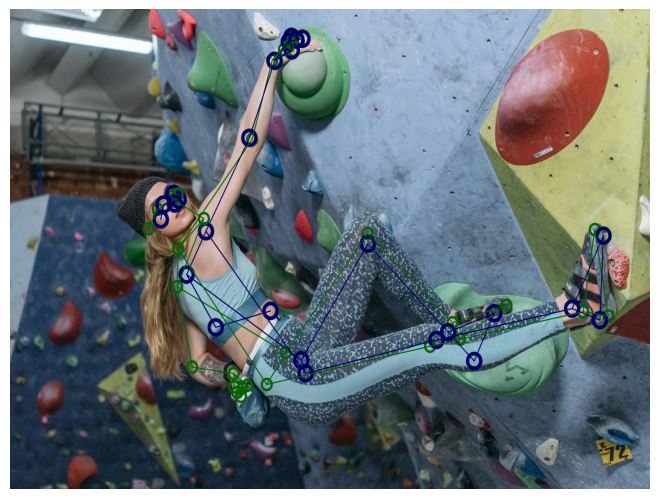

In [5]:
#idx = choice(range(0, estimations.shape[0]))
from src.common.draw import BLUE, GREEN

idx = 32
image = draw_estimations(estimations.iloc[idx],
    label_draw_config=KeypointDrawConfig(
        relative_size=0.0003,
        relative_thickness=0.4,
        left_color=GREEN,
        right_color=GREEN,
        center_color=GREEN
    ),
    predictions_draw_config=KeypointDrawConfig(
        relative_size=0.0005,
        relative_thickness=0.5,
        left_color=BLUE,
        right_color=BLUE,
        center_color=BLUE
    ))
imshow(image, "data/hpe/rgb_estimations.png")

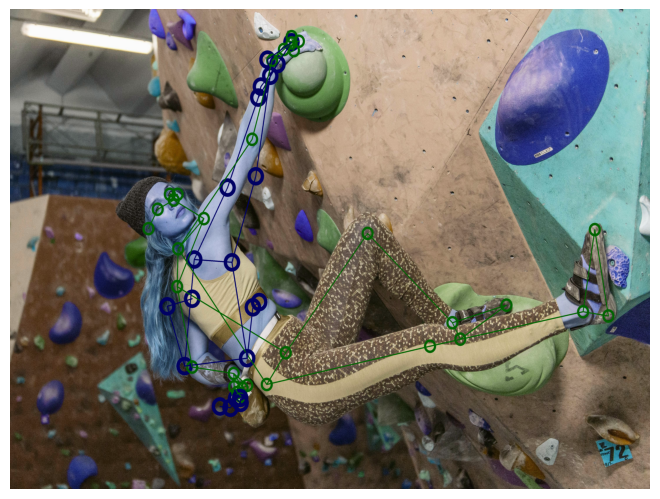

In [7]:
image_bgr = draw_estimations(estimations_bgr.iloc[idx],
    label_draw_config=KeypointDrawConfig(
        relative_size=0.0003,
        relative_thickness=0.4,
        left_color=GREEN,
        right_color=GREEN,
        center_color=GREEN
    ),
    predictions_draw_config=KeypointDrawConfig(
        relative_size=0.0005,
        relative_thickness=0.5,
        left_color=BLUE,
        right_color=BLUE,
        center_color=BLUE
    ))
imshow(image_bgr, "data/hpe/bgr_estimations.png")

In [ ]:
video_paths = glob("data/samples/**/*.*")
video_path = choice(video_paths)

play_with_hpe(video_path)

## Comparison

In [ ]:
from src.hpe.mp.performance import read_estimations as read_mp_estimations
from src.hpe.yolo.performance import read_estimations as read_yolo_estimations
from src.hpe.common.plot import plot_distances_boxplot, plot_confidence_distributions, plot_AP_per_landmark, \
    plot_distances_swarmplot

In [ ]:
mp_est = read_mp_estimations(name="estimations")
mp_bgr_est = read_mp_estimations(name="estimations_bgr")

yolo_est = read_yolo_estimations(name="estimations")
yolo_bgr_est = read_yolo_estimations(name="estimations_bgr")

In [ ]:
plot_distances_boxplot(
    title="",
    ylim=None,
    save_location="data/hpe/distance_boxplot.png",
    estimations=[
        ("MediaPipe", mp_est),
        ("MediaPipe on bgr", mp_bgr_est),
        ("Yolov11", yolo_est),
        ("Yolov11 on bgr", yolo_bgr_est)
    ])

In [ ]:
plot_distances_boxplot(
    title="",
    ylim=(-0.1, 10),
    save_location="data/hpe/distance_boxplot_zoomed.png",
    ylabel="Distance to label, relative to head-bone link",
    estimations=[
        ("MediaPipe", mp_est),
        ("MediaPipe on bgr", mp_bgr_est),
        ("Yolov11", yolo_est),
        ("Yolov11 on bgr", yolo_bgr_est)
    ])

In [ ]:
plot_distances_swarmplot(
    names=["YOLO RGB", "YOLO BGR", "MediaPipe RGB", "MediaPipe BGR"], 
    estimations=[yolo_est, yolo_bgr_est, mp_est, mp_bgr_est],
    #xlim=(0, 10),
    save_location="data/hpe/distance_stripplot.png")

In [ ]:
plot_AP_per_landmark(
    names=["YOLO RGB", "YOLO BGR", "MediaPipe RGB", "MediaPipe BGR"], 
    estimations=[yolo_est, yolo_bgr_est, mp_est, mp_bgr_est],
    save_location="data/hpe/landmark_aps.png"
)

In [ ]:
plot_confidence_distributions(
    names=["MediaPipe RGB", "MediaPipe BGR", "YOLO RGB", "YOLO BGR"], 
    data=[mp_est, mp_bgr_est, yolo_est, yolo_bgr_est],
    save_location="data/hpe/confidence_hist.png")

In [ ]:
plot_confidence_distributions(
    names=["MediaPipe RGB", "MediaPipe BGR", "YOLO RGB", "YOLO BGR"], 
    data=[mp_est, mp_bgr_est, yolo_est, yolo_bgr_est],
    save_location="data/hpe/condifences_distribution_2x2.png",
    combine_plots=False)

In [ ]:
mAP = calc_mean_average_precision(
    pnr = calc_precision_and_recall(mp_est)
)
print(f"MediaPipe on RGB: mAP = {mAP}")

In [ ]:
mAP = calc_mean_average_precision(
    pnr = calc_precision_and_recall(mp_bgr_est)
)
print(f"MediaPipe on BGR: mAP = {mAP}")

In [ ]:
mAP = calc_mean_average_precision(
    pnr = calc_precision_and_recall(yolo_est)
)
print(f"YOLO on RGB: mAP = {mAP}")

In [ ]:
mAP = calc_mean_average_precision(
    pnr = calc_precision_and_recall(yolo_bgr_est)
)
print(f"YOLO on BGR: mAP = {mAP}")

## Statistics

In [ ]:
from pandas import DataFrame
from typing import List
from numpy import mean, median
from scipy.stats import shapiro, wilcoxon, bootstrap
from statsmodels.regression.mixed_linear_model import MixedLM

from src.hpe.mp.performance import read_estimations as read_mp_estimations
from src.hpe.yolo.performance import read_estimations as read_yolo_estimations
from src.common.plot import plot_histograms
from src.hpe.common.typing import HpeEstimation

In [ ]:
mp_est = read_mp_estimations(name="estimations")
mp_bgr_est = read_mp_estimations(name="estimations_bgr")

yolo_est = read_yolo_estimations(name="estimations")
yolo_bgr_est = read_yolo_estimations(name="estimations_bgr")

In [ ]:
def map_to_rel_dist(x: HpeEstimation) -> float | str:
    if not x.is_present(): return "skip" # Does not need to be considered
    if not x.is_detected(): return "invalid" # More difficult. Also skip if either of the two models could not make a prediction

    return x.get_relative_distance()

def generate_distance(x: DataFrame) -> List[float]:
    x = x.drop("NECK", axis=1)
    x = x.map(map_to_rel_dist).values.reshape(-1)
    return [x_dist for x_dist in x if type(x_dist) is not str]

In [ ]:
mp_dist_arr = generate_distance(mp_est)
yolo_bgr_dist_arr = generate_distance(yolo_bgr_est)

In [ ]:
plot_histograms(names=["MediaPipe RGB", "YOLO BGR"],
    data=[mp_dist_arr, yolo_bgr_dist_arr],
    save_location="data/hpe/distance_distribution_zoomed.png",
    title="Distribution of estimation distances",
    legend_location="upper right",
    xlabel="relative distance",
    xlim=(0, 10))

In [ ]:
import matplotlib.pyplot as plt
from numpy import ndarray
from typing import Optional, List, Tuple
from sklearn.metrics import ConfusionMatrixDisplay
from os.path import dirname
from os import makedirs

from src.common.kfold import AbstractFoldCrossValidation
from src.labels import iterate_valid_labels

In [ ]:
from numpy import linspace


def plot_logscale(names: List[str],
        data: List[List[float]],
        #save_location: str = "",
        title: str = "",
        legend_location: str = "upper right",
        xlabel: str = ""):
    
    for name, arr in zip(names, data):
        print(len(arr))
        sorted = arr.copy()
        sorted.sort()
        print(len(sorted))
        stop = 1 / len(arr)
        prob = linspace(1, stop, len(arr))
        print(len(prob))
        plt.scatter(sorted, prob, label=name)
        #plt.xscale('log')
        plt.yscale('log')


    plt.legend(loc=legend_location)
    
    if title: plt.title(title)
    if xlabel: plt.xlabel(xlabel)

    #if save_location: save_current_figure(save_location)

In [ ]:
plot_logscale(names=["MediaPipe RGB", "YOLO BGR"],
    data=[mp_dist_arr, yolo_bgr_dist_arr],
    #save_location="data/hpe/distance_distribution_zoomed.png",
    title="Loglog scale distribution of estimation distances",
    legend_location="upper right",
    xlabel="relative distance")

In [ ]:
print(mean(mp_dist_arr))
print(mean(yolo_bgr_dist_arr))

In [ ]:
print(f"MediaPipe RGB is normally distributed?: {shapiro(mp_dist_arr)}")
print(f"YOLO BGR is normally distributed?: {shapiro(yolo_bgr_dist_arr)}")


In [ ]:
def generate_distance_differences(x: DataFrame, y: DataFrame) -> List[float]:
    x = x.drop("NECK", axis=1)
    y = y.drop("NECK", axis=1)

    x = x.map(map_to_rel_dist).values.reshape(-1)
    y = y.map(map_to_rel_dist).values.reshape(-1)

    print(f"Total number of datapairs: {len(x)}")
    diff = [x_dist - y_dist for (x_dist, y_dist) in zip(x, y) if type(x_dist) is not str and type(y_dist) is not str]
    
    print(f"Valid number of datapairs: {len(diff)}")
    
    return diff

In [ ]:
dist_diff_arr = generate_distance_differences(mp_est, yolo_bgr_est)

In [ ]:
plot_histograms(names=["Distance difference"],
    data=[dist_diff_arr],
    #save_location="data/hpe/distance_difference_distribution.png",
    title="Distribution of difference between distances",
    #legend_location="upper right",
    xlabel="relative distance difference")

plt.axvline(0, c='r', linestyle='--', linewidth=1)

In [ ]:
print(f"Distance differences is normally distributed?: {shapiro(dist_diff_arr)}")

In [ ]:
print(f"Distance differences are symmetrically distributed around 0?: {wilcoxon(dist_diff_arr, alternative="less")}")


In [ ]:
print(median(dist_diff_arr))
res = bootstrap((dist_diff_arr,), median, axis=-1, batch=100)
print(f"[{res.confidence_interval}]")

In [ ]:
def generate_mixed_model_data(mp: DataFrame, yolo: DataFrame):
    res_data = []
    res_columns = ["Group", "Image", "Landmark", "Model", "Distance"]

    mp = mp.drop("NECK", axis=1)
    for row_idx in mp.index:
        column = mp.iloc[row_idx]
        for column_header in column.index:
            estimation: HpeEstimation = column[column_header]
            if not (estimation.is_present() and estimation.is_detected()):
                continue

            group = f"{row_idx}__{column_header}"
            image = f"{row_idx}"
            landmark = column_header
            model = "mp"
            distance = estimation.get_relative_distance()
            
            res_data.append([group, image, landmark, model, distance])

    yolo = yolo.drop("NECK", axis=1)
    for row_idx in yolo.index:
        column = yolo.iloc[row_idx]
        for column_header in column.index:
            estimation: HpeEstimation = column[column_header]
            if not (estimation.is_present() and estimation.is_detected()):
                continue

            group = f"{row_idx}__{column_header}"
            image = f"{row_idx}"
            landmark = column_header
            model = "yolo"
            distance = estimation.get_relative_distance()
            
            res_data.append([group, image, landmark, model, distance])

    return DataFrame(data=res_data, columns=res_columns)

In [ ]:
mixed_model_data = generate_mixed_model_data(mp_est, yolo_bgr_est)

In [ ]:
md_null = MixedLM.from_formula("Distance ~ Landmark", mixed_model_data, groups=mixed_model_data["Image"])
mdf_null =md_null.fit(reml=False)

print(mdf_null.summary())

In [ ]:
md_model = MixedLM.from_formula("Distance ~ Landmark + Model", mixed_model_data, groups=mixed_model_data["Image"])
mdf_model =md_model.fit(reml=False)

print(mdf_model.summary())

In [ ]:
import scipy.stats as stats

# likelihood ratio test
LR_stat =-2*(mdf_null.llf - mdf_model.llf)
p_value = stats.chi2.sf(LR_stat, 1)

print(f"Both models describe the data equally well?: LikelihoodRatioResults(statistic={LR_stat},pvalue={p_value})")